# Kmeans implementation

In [203]:
# necessary imports
%matplotlib inline
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

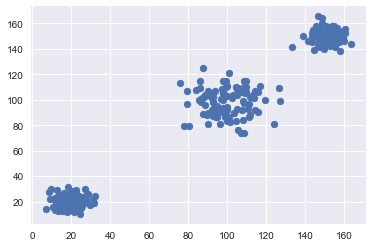

In [204]:
points = np.vstack((np.random.normal(100, 10, size=(100, 2)),
                    np.random.normal(20, 5, size=(100, 2)),
                    np.random.normal(150, 5, size=(100, 2))))

plt.scatter(points[:, 0], points[:, 1]);

We can plot the dataset as well as the cluster centers:

We now write a function that initializes k centroids by randomly selecting them from the data points.

In [205]:
def init_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

Let's try the function:

In [206]:
init_centroids(points, 3)

array([[ 143.51102288,  152.09613992],
       [  15.23361828,   18.67113207],
       [ 148.37162202,  151.0331482 ]])

Let's represent the results using a plot:

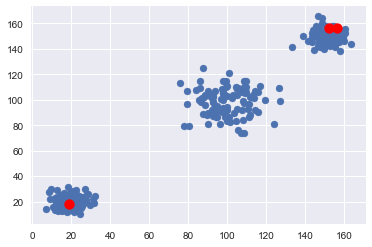

In [207]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [208]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [209]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], d

The last step in the algorithm is to move the centroids to the mean location associated with it:

In [210]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [211]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 150.77344709,  150.37669017],
       [  38.45574195,   40.46891607],
       [ 106.33149409,   99.64417198]])

We can visualize these first two steps in the following way:

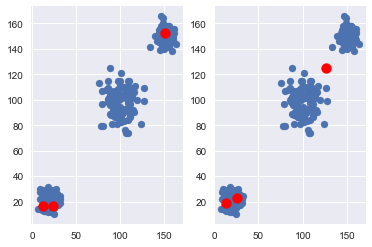

In [212]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

We can animate this type of plot using a module called JSAnimation:

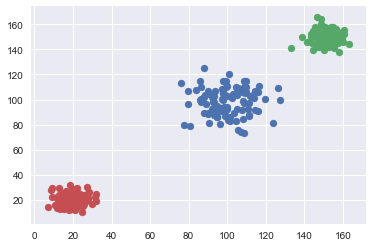

In [213]:
from IPython import display
import time
centroids = initialize_centroids(points, 3)

for i in range(100):
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)

for k in range(centroids.shape[0]):
    cluster_points = points[closest == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])

